In [64]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [65]:
#data collection
#loading dataset to pandas dataframe
wine_dataset = pd.read_csv("C:/Users/KIIT/Desktop/wine_quality_prediction/winequality_red.csv")

In [66]:
#number of rows and columns
wine_dataset.shape

(1599, 12)

In [67]:
#first five rows of dateset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [68]:
#checking missisng values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [69]:
#data analysis and visualization
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


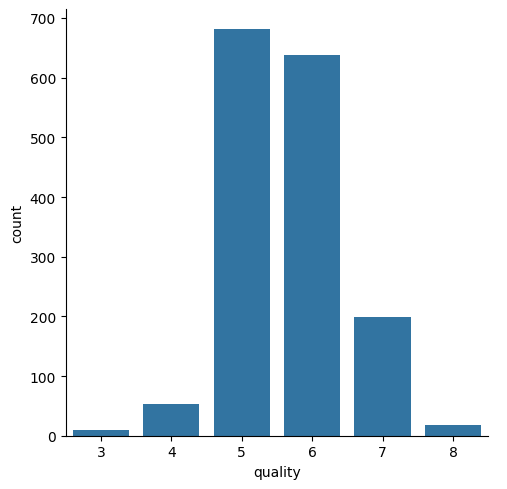

In [70]:
#number of values for each quality
import seaborn as sns
sns.catplot(x='quality', data= wine_dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

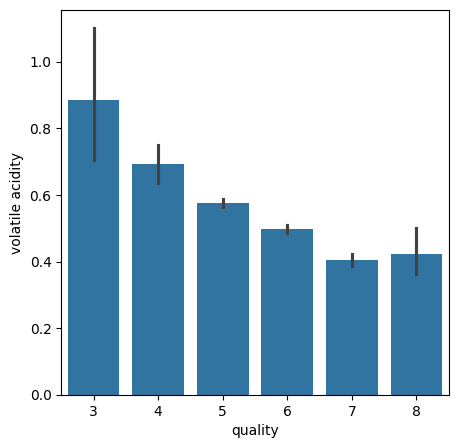

In [71]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='volatile acidity', data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

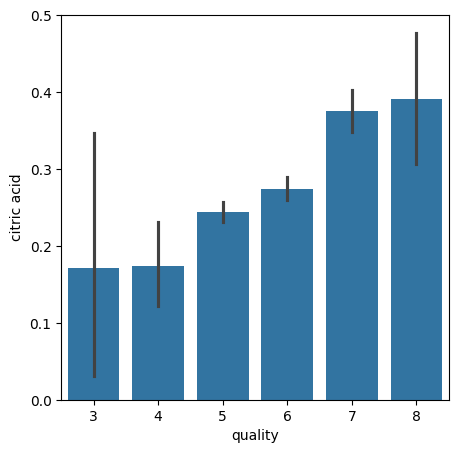

In [72]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='citric acid', data=wine_dataset)

<Axes: xlabel='quality', ylabel='residual sugar'>

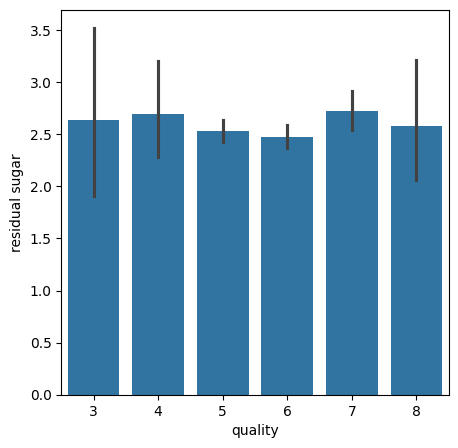

In [73]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='residual sugar', data=wine_dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

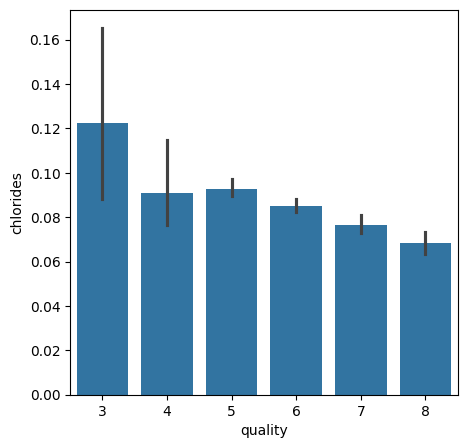

In [74]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='chlorides', data=wine_dataset)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

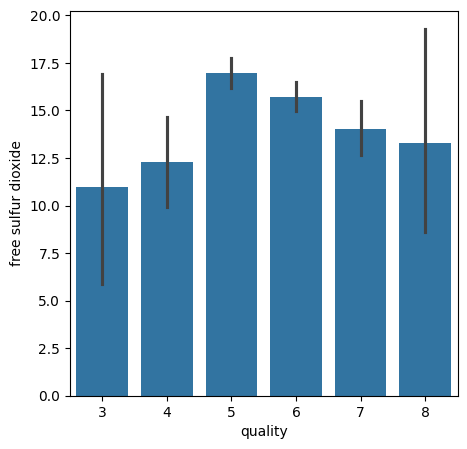

In [75]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='free sulfur dioxide', data=wine_dataset)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

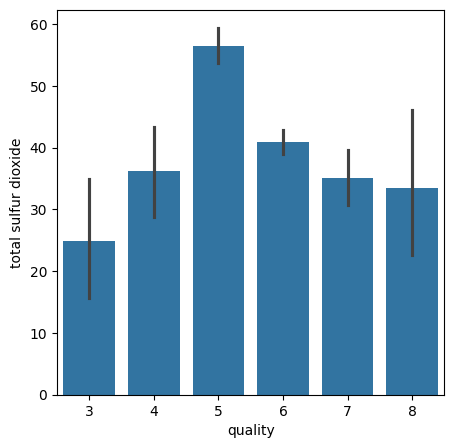

In [76]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='total sulfur dioxide', data=wine_dataset)

<Axes: xlabel='quality', ylabel='density'>

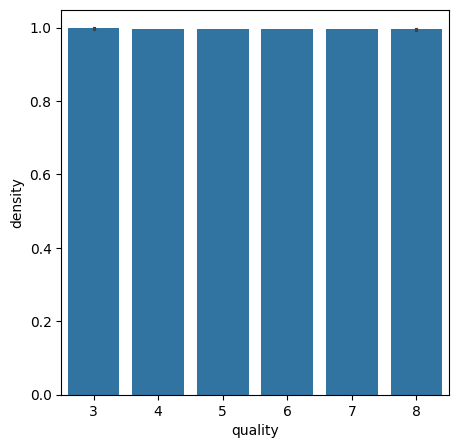

In [77]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='density', data=wine_dataset)

<Axes: xlabel='quality', ylabel='pH'>

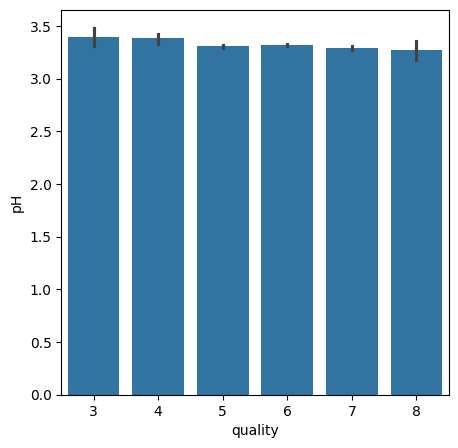

In [78]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='pH', data=wine_dataset)

<Axes: xlabel='quality', ylabel='sulphates'>

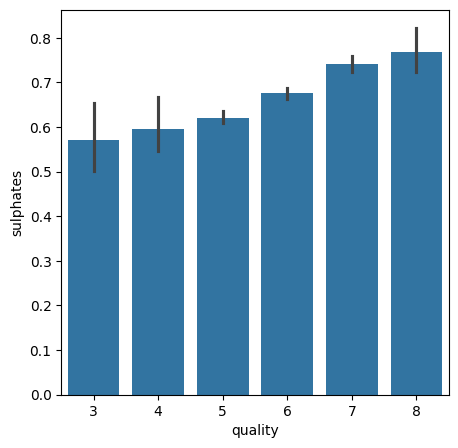

In [79]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='sulphates', data=wine_dataset)

<Axes: xlabel='quality', ylabel='alcohol'>

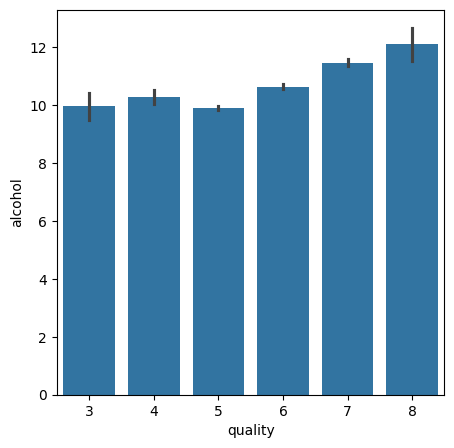

In [81]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='alcohol', data=wine_dataset)

In [82]:
#correlation
correlation=wine_dataset.corr()

<Axes: >

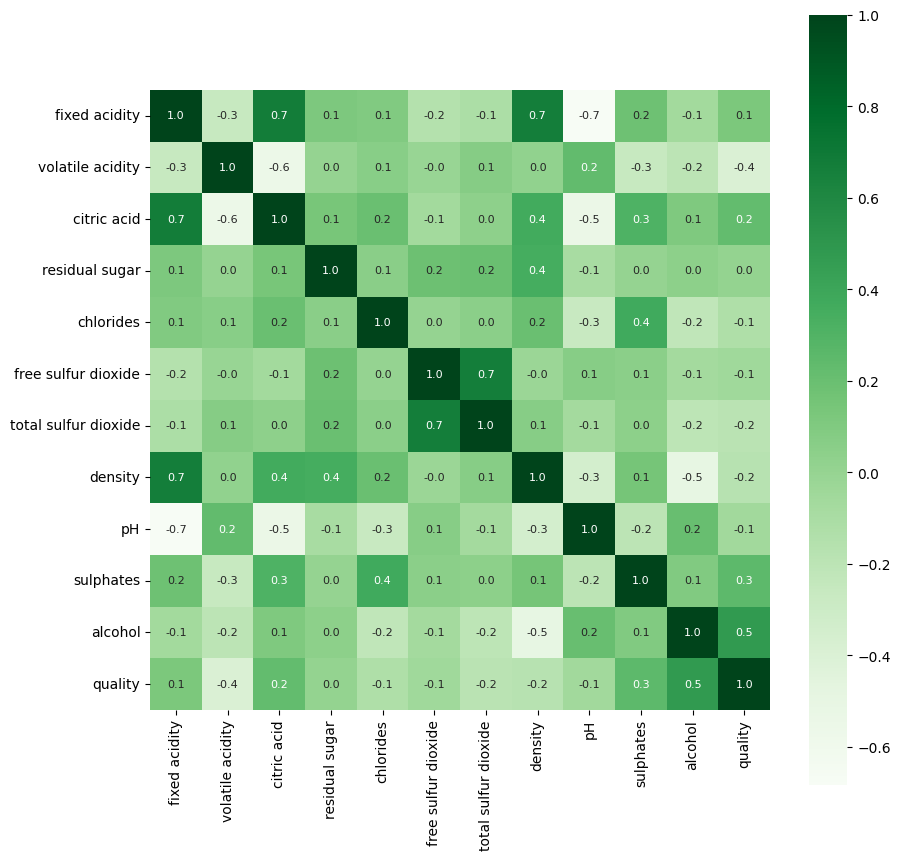

In [83]:
#heatmap to understand correlation between columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar= True, square= True, fmt='.1f', annot =True, annot_kws={'size':8}, cmap='Greens')

In [84]:
#data preprocessing
#seperate the data and label
X= wine_dataset.drop('quality' ,axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [85]:
#label binarization
Y= wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
print(Y)


0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [96]:
#training and testing data
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=3)
#20 or 0.2 percent data is test data 
#random state reproduce the code exactly

In [97]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


In [98]:
#model training_random forest classifier
#Random forest classifer

In [102]:
model= RandomForestClassifier()


In [103]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [101]:
X_test_prediction = model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)


In [105]:
print('Accuracy:',test_data_accuracy)

Accuracy: 0.934375


In [113]:
#building a predictive system
input_data=(11.6,0.53,0.66,3.65,0.121,6.0,14.0,0.9978,3.05,0.74,11.5)
#changing the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the data
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0] ==1):
    print('Good Quality Wine')
else:
    print('Bad Quality wine')

[1]
Good Quality Wine


C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
